# Detecção de Anomalias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import seaborn as sns

In [2]:
mat = loadmat("dado1.mat")
X = mat["X"]
Xval = mat["Xval"]
yval = mat["yval"]

Text(0, 0.5, 'Taxa de transferência (mb/s)')

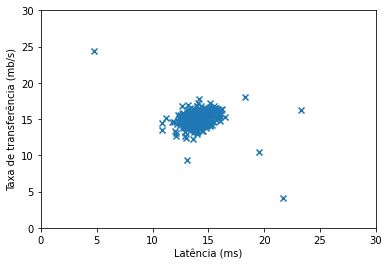

In [3]:
plt.scatter(X[:,0],X[:,1],marker="x")
plt.xlim(0,30)
plt.ylim(0,30)
plt.xlabel("Latência (ms)")
plt.ylabel("Taxa de transferência (mb/s)")

In [4]:
def estimateGaussian(X):
    
    m = X.shape[0]
    
    sum_ = np.sum(X,axis=0)
    mu = 1/m *sum_
    
    var = 1/m * np.sum((X - mu)**2,axis=0)
    
    return mu,var

In [5]:
mu, sigma2 = estimateGaussian(X)

In [6]:
def multivariateGaussian(X, mu, sigma2):
    
    k = len(mu)
    
    sigma2=np.diag(sigma2)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma2)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma2) * X,axis=1))
    return p

In [7]:
p = multivariateGaussian(X, mu, sigma2)

C:\Users\Rodolfo Silva\anaconda3\lib\site-packages\seaborn\distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Text(0, 0.5, 'Taxa de transferência (mb/s)')

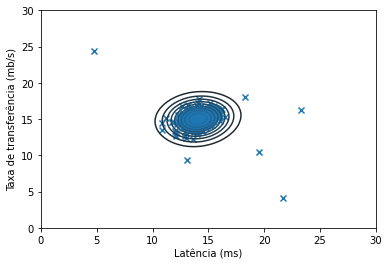

In [8]:
plt.scatter(X[:,0],X[:,1],marker="x")
plt.xlim(0,30)
plt.ylim(0,30)
sns.kdeplot(X, bw=1.5)
plt.xlabel("Latência (ms)")
plt.ylabel("Taxa de transferência (mb/s)")

In [9]:
def selectThreshold(yval, pval):
    best_epi = 0
    best_F1 = 0
    
    stepsize = (max(pval) -min(pval))/1000
    epi_range = np.arange(pval.min(),pval.max(),stepsize)
    for epi in epi_range:
        #O vetor predictions armazena o resultado da operação lógica pval<epi(0 ou 1) para cada entrada de pval.
        predictions = (pval<epi)[:,np.newaxis]
        tp = np.sum(predictions[yval==1]==1)
        fp = np.sum(predictions[yval==0]==1)
        fn = np.sum(predictions[yval==1]==0)
        
        # compute precision, recall and F1
        prec = tp/(tp+fp)
        rec = tp/(tp+fn)
        
        F1 = (2*prec*rec)/(prec+rec)
        
        if F1 > best_F1:
            best_F1 =F1
            best_epi = epi
    return best_epi, best_F1

In [10]:
pval = multivariateGaussian(Xval, mu, sigma2)
epsilon, F1 = selectThreshold(yval, pval)
print("Melhor epsilon obtido por validação:",epsilon)
print("Melhor F1 na validação:",F1)

Melhor epsilon obtido por validação: 8.990852779269495e-05
Melhor F1 na validação: 0.8750000000000001


<ipython-input-9-0885b5b3b571>:14: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)


## Encontrando Anomalias

In [11]:
#O vetor outliers armazena os índices das anomalias.
outliers = []
#Este comando percorre o vetor pval e armazena no vetor outliers os índices das probabilidades menores que épsilon.
for i in range(len(pval)):
    if pval[i] < epsilon:
        outliers.append(i)

print("Índices das anomalias encontradas:",outliers)
print("Número de Anomalias encontradas:",len(outliers))

Índices das anomalias encontradas: [300, 301, 302, 303, 304, 305, 306]
Número de Anomalias encontradas: 7


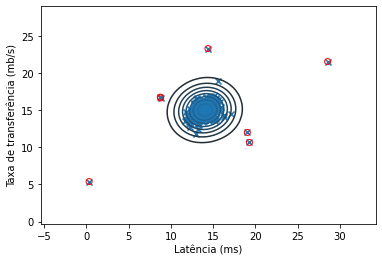

In [12]:
plt.scatter(Xval[:, 0], Xval[:, 1], marker = "x")
plt.xlabel("Latência (ms)")
plt.ylabel("Taxa de transferência (mb/s)")
plt.scatter(Xval[outliers,0], Xval[outliers, 1], facecolors = 'none', edgecolors = 'r')
sns.kdeplot(Xval, bw=1.9)
plt.show()

## Outro exemplo de Detecção de Anomalias

In [13]:
mat = loadmat("dado2.mat")
_X = mat["X"]
_Xval = mat["Xval"]
_yval = mat["yval"]


In [14]:
_mu, _sigma2 = estimateGaussian(_X)
_pval = multivariateGaussian(_Xval, _mu, _sigma2)
epsilon, F1 = selectThreshold(_yval, _pval)
print("Melhor epsilon obtido por validação:",epsilon)
print("Melhor F1 na validação:",F1)

Melhor epsilon obtido por validação: 1.3772288907613575e-18
Melhor F1 na validação: 0.6153846153846154


<ipython-input-9-0885b5b3b571>:14: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp/(tp+fp)


In [15]:
outliers = []
for i in range(len(_pval)):
    if _pval[i] < epsilon:
        outliers.append(i)

print("Índices das anomalias encontradas:",outliers)
print("Número de Anomalias encontradas:",len(outliers))

Índices das anomalias encontradas: [0, 3, 6, 11, 19, 27, 34, 43, 50, 59, 60, 69, 71, 86, 88, 92]
Número de Anomalias encontradas: 16
